# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
#In this dataset, we have a big table where the target variable is the column called "price" referring to the price that a specific
# car sold for. All the other columns- such as "region", "year", and "condition"- are columns that can be used to evaluate which of these
# or combination of these had the greatest impact on the price of the car. 

# As such, our goal for this exercise is to test the columns, perhaps starting with a correlation matrix, to zoom in into certain columns. Depending 
# on the number of columns, we can then test a variety of models, such as a linear regression or a random forest, to see how well
# the models correpond to the data. 
# The goal would be find an appropiate model, improve upon it, then based on the model be able to discern which factors affected the price
# of the car the most

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [2]:
#The first thing we need to do is get acquainted with the data. To do this, we can run a few functions:
# data.head() to see what the top 5 rows look like
# data.info() to see how many rows total and the name and object types of the columns
# isnull.sum() to figure out how many empty rows we are working with. 

In [3]:
import pandas as pd
import numpy as np

In [4]:
car_data = pd.read_csv(r'C:\Users\mosco\Downloads\practical_application_II_starter2\data\vehicles.csv')

In [5]:
car_data.head # shows us a preview of the top of the dataset. Lots of NaNs in these first 5 rows.

<bound method NDFrame.head of                 id                  region  price    year manufacturer  \
0       7222695916                prescott   6000     NaN          NaN   
1       7218891961            fayetteville  11900     NaN          NaN   
2       7221797935            florida keys  21000     NaN          NaN   
3       7222270760  worcester / central MA   1500     NaN          NaN   
4       7210384030              greensboro   4900     NaN          NaN   
...            ...                     ...    ...     ...          ...   
426875  7301591192                 wyoming  23590  2019.0       nissan   
426876  7301591187                 wyoming  30590  2020.0        volvo   
426877  7301591147                 wyoming  34990  2020.0     cadillac   
426878  7301591140                 wyoming  28990  2018.0        lexus   
426879  7301591129                 wyoming  30590  2019.0          bmw   

                           model condition    cylinders    fuel  odometer  \
0   

In [6]:
car_data.info()  #shows us we are deadling with 18 columns total, and that the total number of rows if ~426k. We can also see some columns
# aren't missing any info at all, like "id", "region", and "price", whereas some other columns like "size" have a lot of empty values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [7]:
car_data.isnull().sum().sort_values()  # tells us how many missing values we have per column. "Size" is the worst offender, but several others like "condition",
# "cylinders", "VIN", "drive", and "paint_color" are also pretty significant, missing approximately ~30% of the rows.

id                   0
price                0
state                0
region               0
year              1205
transmission      2556
fuel              3013
odometer          4400
model             5277
title_status      8242
manufacturer     17646
type             92858
paint_color     130203
drive           130567
VIN             161042
condition       174104
cylinders       177678
size            306361
dtype: int64

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [8]:
# Since our initial overview shows that some fields are missing a ton of data, I have decided to drop any column that is missing at least 30%
# of data. I'm choosing 30% based on how many of the fields (cylinders, condition, drive) are missing around that threshold.

threshold = len(car_data) * 0.7  #threshold keep any column in which at least 70% of the data is NON null. Drop everything else.
car_data_cleaned = car_data.dropna(axis=1, thresh=threshold)

print(car_data.shape)
print(car_data_cleaned.shape) #the 70% non-null threshold dropped 6 columns. 

(426880, 18)
(426880, 12)


In [9]:
# lets see what our new dataframe looks like:

car_data_cleaned.sample(5)

,id,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
341386,7307232766,york,42990,2020.0,NaN,Genesis G70 3.3T Sedan 4D,other,2760.0,clean,other,sedan,pa
136019,7316740008,spokane / coeur d'alene,2395,2002.0,NaN,PT Cruiser Limited,gas,127506.0,clean,automatic,wagon,id
3742,7302437530,huntsville / decatur,4500,2006.0,cadillac,dts,gas,100000.0,clean,automatic,sedan,al
70546,7313661438,yuba-sutter,10988,2014.0,kia,sorento lx - awd - rear camera - bluetooth -,gas,NaN,clean,automatic,SUV,ca
300617,7303667811,mansfield,19990,2020.0,mitsubishi,outlander sport es,other,11103.0,clean,other,hatchback,oh


In [10]:
# now we run into another issue which is object type. Let's run .info() on this new cleaned data set to see what we are dealing with:

car_data_cleaned.info()  #we see that we have some columns that are floats but quite a few columns that are string objects. one thing i like to do is
#count the number of unique values in each column to see how easy/crazy it may be to categorize them/bucket them/one-hot-encode them. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  type          334022 non-null  object 
 11  state         426880 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 39.1+ MB


In [11]:
car_data_cleaned.nunique().sort_values()

#we see that for "transmission" even though its a string object, theres just 3 distinct values within it. "fuel" has only 5, "title_status" only 6. 
# lets count only categorical ones to see what they look like

transmission         3
fuel                 5
title_status         6
type                13
manufacturer        42
state               51
year               114
region             404
price            15655
model            29649
odometer        104870
id              426880
dtype: int64

In [12]:
car_data_cleaned.select_dtypes(include='object').nunique().sort_values(ascending=False)

# ok, counting categorial columns, we see that the highest is model, with 29k unique values, followed by a sharp drop to "region" with 404 unique 
# values, and then down from there. 


model           29649
region            404
state              51
manufacturer       42
type               13
title_status        6
fuel                5
transmission        3
dtype: int64

In [13]:
# now we have a better idea of what the dataset looks like lets use the .describe() menthod to see how far the numbers are from each other

car_data_cleaned.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [14]:
# one easy thing to clean this dataset is to set the index to ID, so we dont have redundant columns. 

car_data_cleaned.set_index('id', inplace=True)

In [15]:
car_data_cleaned.sample(5)

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
id,,,,,,,,,,,
7312598567,boise,17995,2013.0,audi,a6,gas,59331.0,clean,automatic,sedan,id
7314348692,ft myers / SW florida,18000,2016.0,volvo,xc60 t5 drive-e premier,gas,42723.0,clean,automatic,SUV,fl
7314095002,greensboro,38896,2012.0,ford,f250 super duty lariat,diesel,141590.0,clean,automatic,NaN,nc
7307219659,indianapolis,3981,2005.0,dodge,grand caravan se,gas,149878.0,clean,automatic,mini-van,in
7309028645,western slope,5500,2007.0,jeep,commander 4wd,gas,197000.0,clean,automatic,SUV,co


In [16]:
# looking at the number of disctinct values for each filed above, "state" has too many at 51. Decided to keep only
# the object fields that have few distinct values: "type, "title_statis", "fuel", "transmission". In addition ill also keep all the numerical columns. 
# this leads me to a final claned dataset:

car_final = car_data_cleaned[['price','year','odometer','fuel','title_status', 'type',	'transmission']]
car_final.sample(5)

,price,year,odometer,fuel,title_status,type,transmission
id,,,,,,,
7303519856,4100,2007.0,162000.0,gas,clean,mini-van,automatic
7306407989,17500,2008.0,201300.0,gas,clean,offroad,manual
7306923679,4999,2001.0,100405.0,gas,clean,wagon,automatic
7316763235,19998,2019.0,48812.0,gas,clean,SUV,automatic
7302947608,4995,2011.0,112000.0,gas,clean,sedan,automatic


In [27]:
cols_to_check = ['fuel', 'title_status', 'type', 'transmission']
car_final = car_final[~car_final[cols_to_check].isin(['unknown']).any(axis=1)]


In [28]:
cat_cols = ['fuel', 'title_status', 'type', 'transmission']
dummies = pd.get_dummies(car_final[cat_cols], drop_first=True)
car_numeric = car_final.drop(columns=cat_cols)
car_encoded = pd.concat([car_numeric, dummies], axis=1)


In [29]:
car_encoded = car_encoded.dropna()


In [31]:
car_encoded.sample(5)

,price,year,odometer,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_parts only,...,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,transmission_manual,transmission_other
id,,,,,,,,,,,,,,,,,,,,,
7315996488,13995,2013.0,97197.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7306160153,32990,2020.0,26829.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7308376013,4500,2007.0,195000.0,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
7303577416,9995,2006.0,89055.0,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
7314365642,10999,2013.0,102000.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
car_encoded.isnull().sum().sum()


0

In [22]:
print("car_encoded" in locals())


True


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [32]:
#gonna run both a linear regression and a random forest model. I will split the data into 60/20/20 first

from sklearn.model_selection import train_test_split

X = car_encoded.drop(columns='price')
y = car_encoded['price']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_val_pred_lr = lr.predict(X_val)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_val_pred_rf = rf.predict(X_val)


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"{model_name} MAE: {mae:,.2f}")
    print(f"{model_name} MSE: {mse:,.2f}")
    print('-' * 30)

evaluate(y_val, y_val_pred_lr, "Linear Regression")
evaluate(y_val, y_val_pred_rf, "Random Forest")


Linear Regression MAE: 166,951.44
Linear Regression MSE: 127,080,871,856,340.14
------------------------------
Random Forest MAE: 155,313.48
Random Forest MSE: 203,125,898,339,696.81
------------------------------


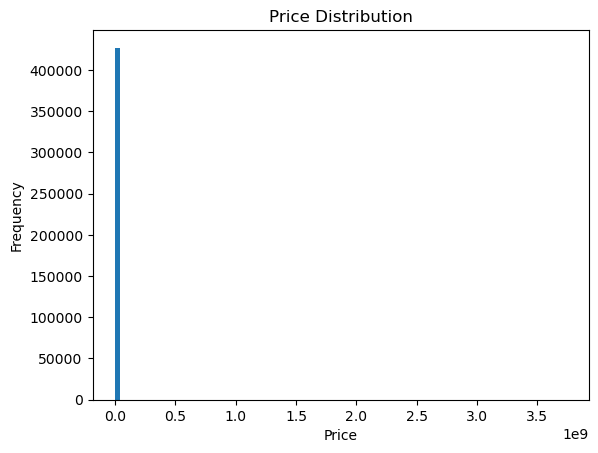

In [34]:
# wow, both MSEs are absolutely awful. lets look at price outliers in data:
import matplotlib.pyplot as plt
plt.hist(car_final['price'], bins=100)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


In [35]:
import pandas as pd

# Get feature names and coefficients
coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': lr.coef_
}).sort_values(by='coefficient', key=abs, ascending=False)

print(coef_df.head(10))  # Top 10 most impactful features


                    feature    coefficient
7      title_status_missing -411531.739603
8   title_status_parts only -370807.685742
16             type_offroad -235911.777721
15            type_mini-van -159056.906822
11                 type_bus -142695.126506
12         type_convertible -130730.519335
10     title_status_salvage -120495.087056
22               type_wagon -116347.942266
21                 type_van -111646.469541
19               type_sedan -104833.033518


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [ ]:
#In this project, I cleaned and prepared a dataset of used vehicle listings to explore which features influence car prices. 
#I removed columns with heavy missingness, filtered out “unknown” entries, and selected a set of relevant numeric and 
#categorical features (year, odometer, fuel, title_status, type, and transmission). After one-hot encoding, I built and evaluated 
#two models — linear regression and random forest — using a 60/20/20 train/validation/test split.

#Both models returned high error values (MAE ~ $150–170K). If I continued, I would focus on removing or capping those outliers and 
#tuning the model parameters. Despite the rough metrics, this was a solid first pass at the modeling pipeline.